<h3>Task 1</h3>

1. С помощью запроса выберите фильмы ранее 2018 года

In [2]:
import sqlite3


con = sqlite3.connect('imdb_small_indexed.db')  # подключение
cur = con.cursor()  # курсор
first_point = """
SELECT *
FROM titles
WHERE premiered < 2018
"""
cur.execute(first_point)
while True:
    result = cur.fetchmany(2)
    if len(result) > 0:
        print(result)
    else:
        break

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2. 50 самых популярных фильмов (по кол-ву оценок)

In [15]:
second_point = """
SELECT *
FROM rating
ORDER BY votes DESC
LIMIT 50
"""
cur.execute(second_point)
while True:
    result = cur.fetchmany(2)
    if len(result) > 0:
        print(result)
    else:
        break

[(160316, 10.0, 5), (212915, 10.0, 5)]
[(225177, 10.0, 5), (10276912, 10.0, 6)]
[(10292952, 10.0, 5), (10447680, 10.0, 5)]
[(10608660, 10.0, 8), (10719080, 10.0, 5)]
[(11007042, 10.0, 5), (11009288, 10.0, 9)]
[(11067956, 10.0, 5), (11084380, 10.0, 8)]
[(11157146, 10.0, 5), (11460966, 10.0, 8)]
[(11464266, 10.0, 5), (11469940, 10.0, 6)]
[(11651564, 10.0, 6), (11683942, 10.0, 5)]
[(11692176, 10.0, 5), (11804094, 10.0, 9)]
[(11808666, 10.0, 5), (11809482, 10.0, 7)]
[(11905308, 10.0, 5), (11930236, 10.0, 9)]
[(11938258, 10.0, 8), (11952822, 10.0, 15)]
[(11972952, 10.0, 6), (12133822, 10.0, 5)]
[(12133824, 10.0, 5), (12337762, 10.0, 5)]
[(12372270, 10.0, 108), (12385356, 10.0, 27)]
[(12402868, 10.0, 5), (12406160, 10.0, 839)]
[(12593524, 10.0, 7), (12615706, 10.0, 5)]
[(12661310, 10.0, 224), (12683912, 10.0, 20)]
[(12686352, 10.0, 6), (12696750, 10.0, 6)]
[(12699564, 10.0, 5), (12728950, 10.0, 714)]
[(12750500, 10.0, 6), (12757372, 10.0, 650)]
[(12773752, 10.0, 10), (12844464, 10.0, 10)]
[(

3. 10 самых популярных (по кол-ву оценок и с рейтингом >= 7) комедий 2019 года

In [14]:
third_point = """
SELECT *
FROM titles
    JOIN film_genres ON titles.title_id = film_genres.title_id
	JOIN rating ON titles.title_id = rating.title_id
	JOIN genre_types ON genre_name = "Comedy"
WHERE rating >= 7 AND premiered = 2019
ORDER BY votes DESC
LIMIT 10
"""
cur.execute(third_point)
while True:
    result = cur.fetchmany(2)
    if len(result) > 0:
        print(result)
    else:
        break

[(88763, 8.5, 1036582, 88763, 6, 6, 'Comedy'), (2015381, 8.0, 1029048, 2015381, 6, 6, 'Comedy')]
[(266543, 8.1, 934018, 266543, 6, 6, 'Comedy'), (120382, 8.1, 918987, 120382, 6, 6, 'Comedy')]
[(1049413, 8.2, 918121, 1049413, 6, 6, 'Comedy'), (1431045, 8.0, 887702, 1431045, 6, 6, 'Comedy')]
[(114709, 8.3, 870897, 114709, 6, 6, 'Comedy'), (198781, 8.0, 800678, 198781, 6, 6, 'Comedy')]
[(108778, 8.9, 794054, 108778, 6, 6, 'Comedy'), (208092, 8.3, 771018, 208092, 6, 6, 'Comedy')]


4. С помощью запроса выберите год выхода и название фильмов с кем-то из ваших любимых актеров

In [17]:
fourth_point = """
SELECT *
FROM titles
	JOIN crew ON titles.title_id = crew.title_id
	JOIN people ON crew.person_id = people.person_id
WHERE name = 'Natalie Portman' AND title = 'Vox Lux' AND premiered = '2018'
"""
cur.execute(fourth_point)
while True:
    result = cur.fetchmany(2)
    if len(result) > 0:
        print(result)
    else:
        break

[(5960374, 1, 'Vox Lux', 0, 2018, None, 114, 5960374, 204, 2, 204, 'Natalie Portman', 1981, None)]


5.Выберите жанр и посчитайте кол-во фильмов по годам

In [3]:
fifth_point = """
SELECT titles.premiered, count(titles.premiered)
FROM titles
    JOIN film_genres ON titles.title_id = film_genres.title_id
    JOIN genre_types ON film_genres.genre_id = genre_types.id
WHERE genre_name = "Comedy"
GROUP BY premiered
"""
cur.execute(fifth_point)
while True:
    result = cur.fetchmany(2)
    if len(result) > 0:
        print(result)
    else:
        break

[(None, 0), (1900, 3)]
[(1906, 1), (1907, 1)]
[(1909, 5), (1910, 4)]
[(1911, 7), (1912, 12)]
[(1913, 28), (1914, 67)]
[(1915, 128), (1916, 179)]
[(1917, 220), (1918, 302)]
[(1919, 331), (1920, 248)]
[(1921, 237), (1922, 206)]
[(1923, 182), (1924, 155)]
[(1925, 216), (1926, 264)]
[(1927, 281), (1928, 247)]
[(1929, 194), (1930, 297)]
[(1931, 344), (1932, 375)]
[(1933, 405), (1934, 430)]
[(1935, 454), (1936, 516)]
[(1937, 514), (1938, 488)]
[(1939, 435), (1940, 446)]
[(1941, 470), (1942, 420)]
[(1943, 372), (1944, 300)]
[(1945, 268), (1946, 290)]
[(1947, 300), (1948, 329)]
[(1949, 397), (1950, 443)]
[(1951, 455), (1952, 517)]
[(1953, 513), (1954, 468)]
[(1955, 511), (1956, 549)]
[(1957, 595), (1958, 620)]
[(1959, 641), (1960, 645)]
[(1961, 647), (1962, 662)]
[(1963, 698), (1964, 748)]
[(1965, 694), (1966, 706)]
[(1967, 713), (1968, 751)]
[(1969, 790), (1970, 875)]
[(1971, 854), (1972, 892)]
[(1973, 818), (1974, 839)]
[(1975, 954), (1976, 898)]
[(1977, 782), (1978, 786)]
[(1979, 880), (198

6. Найдите актеров-долгожителей
- топ-10 по возрасту
- список тех, кто дожил до 100 лет и более

In [7]:
six1_point = """
SELECT DISTINCT people.name, CAST(people.died AS INTEGER) - CAST(people.born AS INTEGER) AS diff
FROM titles
	JOIN crew ON titles.title_id = crew.title_id
	JOIN people ON crew.person_id = people.person_id
ORDER BY diff DESC
LIMIT 10
"""
cur.execute(six1_point)
while True:
    result = cur.fetchmany(2)
    if len(result) > 0:
        print(result)
    else:
        break

[(122,), (118,)]
[(116,), (116,)]
[(113,), (112,)]
[(112,), (112,)]
[(112,), (112,)]


In [6]:
six2_point = """
SELECT people.name, CAST(people.died AS INTEGER) - CAST(people.born AS INTEGER) AS diff
FROM titles
	JOIN crew ON titles.title_id = crew.title_id
	JOIN people ON crew.person_id = people.person_id
WHERE diff >= 100
"""
cur.execute(six2_point)
while True:
    result = cur.fetchmany(2)
    if len(result) > 0:
        print(result)
    else:
        break

[(101,), (101,)]
[(100,), (103,)]
[(100,), (101,)]
[(101,), (101,)]
[(101,), (101,)]
[(105,), (100,)]
[(101,), (102,)]
[(103,), (102,)]
[(100,), (100,)]
[(101,), (105,)]
[(100,), (102,)]
[(101,), (105,)]
[(101,), (102,)]
[(102,), (101,)]
[(103,), (100,)]
[(101,), (100,)]
[(100,), (101,)]
[(102,), (100,)]
[(100,), (100,)]
[(101,), (102,)]


Посчитайте распределение оценок (округленных до ближайшего целого) для комедий и для документальных фильмов, постройте график для сравнения

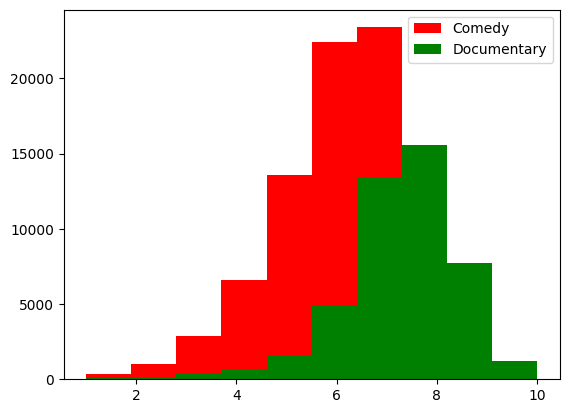

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
con = sqlite3.connect('imdb_small_indexed.db')  # подключение
rating = """
SELECT *
FROM titles
    JOIN film_genres ON titles.title_id = film_genres.title_id
    JOIN genre_types ON film_genres.genre_id = genre_types.id
	JOIN rating ON titles.title_id = rating.title_id
"""
df7 = pd.read_sql_query(rating, con)
plt.hist(df7[df7['genre_name'].str.contains('Comedy')]['rating'], color='red')
plt.hist(df7[df7['genre_name'].str.contains('Documentary')]['rating'], color='green')
plt.legend(['Comedy', 'Documentary'])
plt.show()

Сохраните результат пункта 6 в базе в новой таблице

"вот первый пункт где топ10 долгожителей:"
CREATE TABLE tosy as
SELECT people.name, CAST(people.died AS INTEGER) - CAST(people.born AS INTEGER) AS diff
FROM titles
	JOIN crew ON titles.title_id = crew.title_id
	JOIN people ON crew.person_id = people.person_id
ORDER BY diff DESC

"вот второй пункт:"
CREATE TABLE suzy as
SELECT people.name, CAST(people.died AS INTEGER) - CAST(people.born AS INTEGER) AS diff
FROM titles
	JOIN crew ON titles.title_id = crew.title_id
	JOIN people ON crew.person_id = people.person_id
WHERE diff >= 100

Cтарайтесь максимально решить задачу в запросе, а не внешними инструментами

Посмотрите, какое среднее распредление долей мужчин и женщин в фильмах разных лет по жанрам

1.посчитайте долю женщин среди участников фильмов жанра определенного года
2.сделайте pivot_table по жанрам и годам
3.изучите, какие есть закономерности и опишите их
4.проиллюстрируйте с помощью графика 2-3 наиболее примечательных жанра
5.можно ли сделать какие-то выводы об изменениях в индустрии?

Посчитайте долю женщин среди участников фильмов жанра определенного года:
SELECT
	premiered,
	(sum(CASE WHEN category=2 THEN 1 ELSE 0 END))*100/(sum(CASE WHEN (category=2 or category=1) THEN 1 ELSE 0 END)) as actress
FROM titles
	JOIN crew ON titles.title_id = crew.title_id
	JOIN film_genres ON titles.title_id = film_genres.title_id
	JOIN genre_types ON film_genres.genre_id = genre_types.id
WHERE genre_types.genre_name = "Drama" and premiered = 1913


Сделайте pivot_table по жанрам и годам

In [31]:
import sqlite3
import pandas as pd

con = sqlite3.connect('imdb_small_indexed.db')
sql3 = """
SELECT
	genre_name, premiered,
	(sum(CASE WHEN category=2 THEN 1 ELSE 0 END))*100/(sum(CASE WHEN (category=2 or category=1) THEN 1 ELSE 0 END)) as women
FROM titles
    JOIN crew ON titles.title_id = crew.title_id
	JOIN film_genres ON titles.title_id = film_genres.title_id
	JOIN genre_types ON film_genres.genre_id = genre_types.id
GROUP BY premiered, genre_name
"""
df3 = pd.read_sql_query(sql3,con)
print(df3)

     genre_name  premiered  women
0        Action        NaN   28.0
1         Adult        NaN   27.0
2     Adventure        NaN   31.0
3     Animation        NaN   34.0
4     Biography        NaN   33.0
...         ...        ...    ...
2948      Drama     2027.0    0.0
2949    Fantasy     2027.0    0.0
2950     Action     2028.0   44.0
2951  Adventure     2028.0   44.0
2952      Drama     2028.0   44.0

[2953 rows x 3 columns]


In [33]:
ps = pd.pivot_table(df3, index=["premiered", "genre_name"])
print(ps)

                      women
premiered genre_name       
1894.0    Romance      33.0
1900.0    Biography    16.0
          Drama        16.0
1902.0    Drama       100.0
1903.0    Biography    50.0
...                     ...
2027.0    Drama         0.0
          Fantasy       0.0
2028.0    Action       44.0
          Adventure    44.0
          Drama        44.0

[2835 rows x 1 columns]


Можно сказать, что в конце 19 века и начала 20 века было популярно приглашать женщин для съемок в фильмов в жанре Драма, Романтика, Комедия и Мьюзикал. Но мало, кто из них в то время участвовал в военных фильмах, автобиографичных, ужастиках. Во второй половине 20 века популярны были жанры Ток-шоу, Анимация, Film-Noir. В начале 21 века женщины актрисы снимались больше во взрослых фильмах, короткометражные фильмы, мьюзикал и семейные. Потом доля была около 50 в жанрах Приключения, Документальные фильмы и комедии.

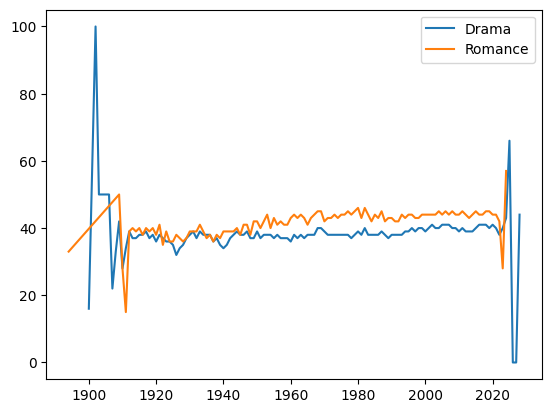

In [36]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

con = sqlite3.connect('imdb_small_indexed.db')
genres = """
SELECT
	genre_name, premiered,
	(sum(CASE WHEN category=2 THEN 1 ELSE 0 END))*100/(sum(CASE WHEN (category=2 or category=1) THEN 1 ELSE 0 END)) as women
FROM titles
    JOIN crew ON titles.title_id = crew.title_id
	JOIN film_genres ON titles.title_id = film_genres.title_id
	JOIN genre_types ON film_genres.genre_id = genre_types.id
GROUP BY premiered, genre_name
"""
df_genres = pd.read_sql_query(genres, con)
drama = df_genres[df_genres['genre_name'].str.contains('Drama')]
x1 = drama['premiered'].tolist()
y1 = drama['women'].tolist()
romance = df_genres[df_genres['genre_name'].str.contains('Romance')]
x2 = romance['premiered'].tolist()
y2 = romance['women'].tolist()

fig, ax = plt.subplots()
ax.plot(x1, y1, label = 'Drama')
ax.plot(x2, y2, label = 'Romance')
ax.legend()
plt.show()

Как видно на графике, доля женщин в 1900 была высокая для жанра Драма, а средняя доля для жанра Романтика. Значит, женщин в то время было много в фильмах и сериалах жанра Драма. Далее этот тренд значительно уменьшился, как и тренд в жанре Романтика. До 2020-ых годов тренды были почти на одинаковой величине, каждый либо падал на немного, а потом поднимался. В 2020 году был пик съемок актрис в Драмах, как и для жанра Романтики. После 2020 жанра Драма опять тренд уменьшился и опять повысился. Для жанра Романтика тренд повышался после 2020 года. Значит, в индустрии уведличилось внимание к актрисам, их было больше, чем других участников.

Задание на 10 баллов

Представьте, что мы создаем сайт про кино и хотим хранить данные пользователей и их оценки.

1. С какими объектами мы работаем? Какие таблицы нужно добавить в базу? Какие параметры нужно хранить?
2. Как эти таблицы связаны между собой и с таблицами, уже имеющимися в базе?
3. Нарисуйте схему и прокомментируйте (схему можно положить картинкой в репозиторий или вставить в тетрадку).
4. Какие данные нужно будет часто доставать или соединять? Какие индексы в базе хорошо было бы создать, чтобы пользователю было комфортно и быстро получать статистику или какую-то иную информацию. (Представьте, например, свои действия при работе с КиноПоиском или IMDB).
5. Каких данных (с сайта или просто придумать свои) не хватает в базе?

Если мы хотим хранить  данные пользователей, то нужно создать таблицу “Users”,где будет указано айди пользователя, имя пользователя(произвольное, какое сам захочет пользователь), юзернейм пользователя(это юз, который начинается с @), эмейл, пароль, когда был создан пароль, когда был обновлен пароль.

Можно добавить таблицу, где будет указано, какие студии работали при создании фильма. Например, производство, спецэффекты, студии дубляжа. Можно добавить таблицу “Награды”, где будет указано,  какие награды получил фильм или сериал(например, оскар, эмми, золотой глобус, премия от MTV, Сатурн). Можно добавить таблицу “Связи”, где будет указано в каких других программах упоминается, где есть отсылки, где спародирован. Также очень важна будет таблица “Саундтреков”, где будет указано какие музыкальные треки использовались. Там будет указан автор песни, год выпуска, продолжительность песни, к какому жанру относится песня. Можно добавить таблицу “Сайты”, где будет список социальных сетей сериала или фильмы. Например, есть сериал “Очень странные дела” и у него в этой таблице будет ссылка на инстаграм, твиттер, фейсбук и т.д.

В таблице "Users" можно создать индекс user_id, по которому можно будет присоединить таблицу "rating". В других таблицах можно создать индекс "title_id", все они будут соединяться с таблицей "titles".

В репозитории я прикрепила свою схему, но из изначальной бд я оставила только таблицы titles и rating, чтобы мои новые другие таблицы поместились.